In [ ]:
import pandas as pd
import numpy as np
import math

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/All Datasets For Machine Learning/User_Data.csv")

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.shape

(400, 5)

In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df['Purchased'].mean()

0.3575

In [ ]:
try:
  converted = pd.to_numeric(df['EstimatedSalary'])
  print(converted)
  print(type(converted))
except ValueError:
  print("Not Numeric column")

0      19000
1      20000
2      43000
3      57000
4      76000
       ...  
395    41000
396    23000
397    20000
398    33000
399    36000
Name: EstimatedSalary, Length: 400, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
df["EstimatedSalary"].median()

70000.0

In [ ]:
df["EstimatedSalary"].mode()

0    72000
Name: EstimatedSalary, dtype: int64

In [ ]:
np.percentile(df['EstimatedSalary'], [25, 50, 75])

array([43000., 70000., 88000.])

In [ ]:
df['EstimatedSalary'].max()

150000

In [ ]:
df['EstimatedSalary'].min()

15000

In [ ]:
df['Gender']

0        Male
1        Male
2      Female
3      Female
4        Male
        ...  
395    Female
396      Male
397    Female
398      Male
399    Female
Name: Gender, Length: 400, dtype: object

In [ ]:
df['EstimatedSalary'].count()

400

In [ ]:
df['EstimatedSalary'].std()

34096.960282424785

In [ ]:
cor = df.corr()
print(type(cor))
cor

<class 'pandas.core.frame.DataFrame'>


,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


In [ ]:
cor['Age']

User ID           -0.000721
Age                1.000000
EstimatedSalary    0.155238
Purchased          0.622454
Name: Age, dtype: float64

In [ ]:
df['EstimatedSalary'].var()

1162602700.5012531

In [ ]:
import math
math.sqrt(1162602700.5012531)

34096.960282424785

In [ ]:
def calculate_all_state_values(df):
  statData = {}
  indexes = ['mean', 'median', 'variance', 'standard deviation', 'minimum', 'maximum', '25% percentile', '50% percentile', '75% percentile', "count"]
  for column in df.columns:
    try:
      columnConvertedValues = pd.to_numeric(df[column])
      mean = df[column].mean()
      median = df[column].median()
      var = df[column].var()
      std = df[column].std()
      min = df[column].min()
      max = df[column].max()
      percentile25 = np.percentile(df[column], 25)
      percentile50 = np.percentile(df[column], 50)
      percentile75 = np.percentile(df[column], 75)
      count = df[column].count()
      statData[column] = [mean, median, var, std, min, max, percentile25, percentile50, percentile75, count]
    except ValueError:
      pass
  stat = pd.DataFrame(statData, index = indexes);
  return stat;
      


In [ ]:
calculate_all_state_values(df)

,User ID,Age,EstimatedSalary,Purchased
mean,1.569154e+07,37.655000,6.974250e+04,0.357500
median,1.569434e+07,37.000000,7.000000e+04,0.000000
variance,5.134915e+09,109.890702,1.162603e+09,0.230269
standard deviation,7.165832e+04,10.482877,3.409696e+04,0.479864
minimum,1.556669e+07,18.000000,1.500000e+04,0.000000
maximum,1.581524e+07,60.000000,1.500000e+05,1.000000
25% percentile,1.562676e+07,29.750000,4.300000e+04,0.000000
50% percentile,1.569434e+07,37.000000,7.000000e+04,0.000000
75% percentile,1.575036e+07,46.000000,8.800000e+04,1.000000
count,4.000000e+02,400.000000,4.000000e+02,400.000000


In [ ]:
np.sort(df['EstimatedSalary'])

array([ 15000,  15000,  15000,  15000,  16000,  16000,  17000,  17000,
        17000,  18000,  18000,  18000,  18000,  19000,  19000,  20000,
        20000,  20000,  20000,  20000,  21000,  21000,  22000,  22000,
        22000,  22000,  22000,  23000,  23000,  23000,  23000,  23000,
        23000,  23000,  25000,  25000,  25000,  25000,  26000,  26000,
        26000,  26000,  27000,  27000,  27000,  28000,  28000,  28000,
        28000,  28000,  28000,  29000,  29000,  30000,  30000,  30000,
        30000,  31000,  31000,  32000,  32000,  32000,  32000,  32000,
        33000,  33000,  33000,  33000,  33000,  33000,  34000,  34000,
        34000,  34000,  35000,  35000,  36000,  36000,  36000,  37000,
        38000,  38000,  38000,  39000,  39000,  39000,  39000,  41000,
        41000,  41000,  42000,  42000,  42000,  42000,  42000,  43000,
        43000,  43000,  43000,  43000,  43000,  43000,  44000,  44000,
        44000,  44000,  45000,  45000,  46000,  47000,  47000,  47000,
      

In [ ]:
def calculate_all_state_values_using_formula(df):
  statData = {}
  statData['Statistical Parameters'] = ['mean', 'median', 'mode', 'variance', 'standard deviation', 'minimum', 'maximum', '25% percentile', '50% percentile', '75% percentile', "count"]
  for column in df.columns:
    try:
      columnConvertedValues = pd.to_numeric(df[column])
      mean = df[column].sum()/len(df[column])
      sorted_data = np.sort(df['EstimatedSalary'])
      median = df[column].median()
      mode = df[column].mode()
      var = np.square(df[column] - mean).sum()/len(df[column])
      std = np.sqrt(np.square(df[column] - mean).sum()/len(df[column]))
      min = df[column].min()
      max = df[column].max()
      percentile25 = df.loc[int((len(df[column])+1)/4), column]
      percentile50 = np.percentile(df[column], 50)
      percentile75 = np.percentile(df[column], 75)
      count = df[column].count()
      statData[column] = [mean, median, mode, var, std, min, max, percentile25, percentile50, percentile75, count]
    except ValueError:
      pass
  return pd.DataFrame(statData);
      


In [ ]:
calculate_all_state_values_using_formula(df)

,Statistical Parameters,User ID,Age,EstimatedSalary,Purchased
0,mean,15691539.7575,37.655,69742.5,0.3575
1,median,15694341.5,37.0,70000.0,0.0
2,mode,0 15566689 1 15569641 2 1557076...,"0 35 Name: Age, dtype: int64","0 72000 Name: EstimatedSalary, dtype: int64","0 0 Name: Purchased, dtype: int64"
3,variance,5122077764.203693,109.615975,1159696193.75,0.229694
4,standard deviation,71568.692626,10.469765,34054.31241,0.479264
5,minimum,15566689,18,15000,0
6,maximum,15815236,60,150000,1
7,25% percentile,15766289,27,88000,0
8,50% percentile,15694341.5,37.0,70000.0,0.0
9,75% percentile,15750363.0,46.0,88000.0,1.0


In [ ]:
import statistics
def calculate_all_state_values_using_stat_module(df):
  statData = {}
  indexes = ['mean', 'median', 'variance', 'standard deviation', 'minimum', 'maximum', '25% percentile', '50% percentile', '75% percentile', "count", "hormonic mean"]
  for column in df.columns:
    try:
      columnConvertedValues = pd.to_numeric(df[column])
      mean = statistics.mean(df[column])
      median = statistics.median(df[column])
      var = statistics.variance(df[column])
      std = statistics.stdev(df[column])
      min = df[column].min()
      max = df[column].max()
      percentile25 = np.percentile(df[column], 25)
      percentile50 = np.percentile(df[column], 50)
      percentile75 = np.percentile(df[column], 75)
      count = df[column].count()
      hormonic_mean = statistics.harmonic_mean(df[column])
      statData[column] = [mean, median, var, std, min, max, percentile25, percentile50, percentile75, count, hormonic_mean]
    except ValueError:
      pass
  stat = pd.DataFrame(statData, index = indexes);
  return stat;

In [ ]:
calculate_all_state_values_using_stat_module(df)

,User ID,Age,EstimatedSalary,Purchased
mean,1.569154e+07,37.655000,6.974250e+04,0.357500
median,1.569434e+07,37.000000,7.000000e+04,0.000000
variance,5.134915e+09,109.890702,1.162603e+09,0.230269
standard deviation,7.165832e+04,10.482877,3.409696e+04,0.479864
minimum,1.556669e+07,18.000000,1.500000e+04,0.000000
maximum,1.581524e+07,60.000000,1.500000e+05,1.000000
25% percentile,1.562676e+07,29.750000,4.300000e+04,0.000000
50% percentile,1.569434e+07,37.000000,7.000000e+04,0.000000
75% percentile,1.575036e+07,46.000000,8.800000e+04,1.000000
count,4.000000e+02,400.000000,4.000000e+02,400.000000


In [ ]:
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

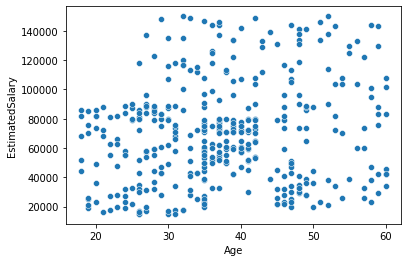

In [ ]:
sns.scatterplot(x=df['Age'], y=df["EstimatedSalary"])

In [ ]:
df.iloc[:,2:4]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
mMScalar = MinMaxScaler()
new_data = mMScalar.fit_transform(df.iloc[:,2:4]) 

In [ ]:
new_data[0]

array([0.02380952, 0.02962963])

In [ ]:
x = [new_data[i][0] for i in range(len(new_data))]
y = [new_data[i][1] for i in range(len(new_data))]

<Axes: >

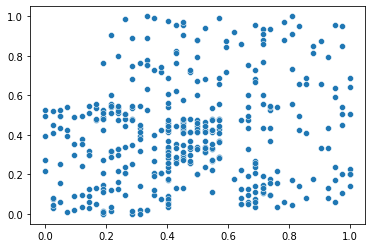

In [ ]:
sns.scatterplot(x=x, y=y)